## Performing Student Performance project

- Upload student-mat and student-por.csv files

In [2]:
import pandas as pd

# Load the datasets from CSV files
math_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=';')

# Combine both datasets
df = pd.concat([math_df, por_df], axis=0).reset_index(drop=True)

In [3]:
# Handle missing values
df.isnull().sum()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

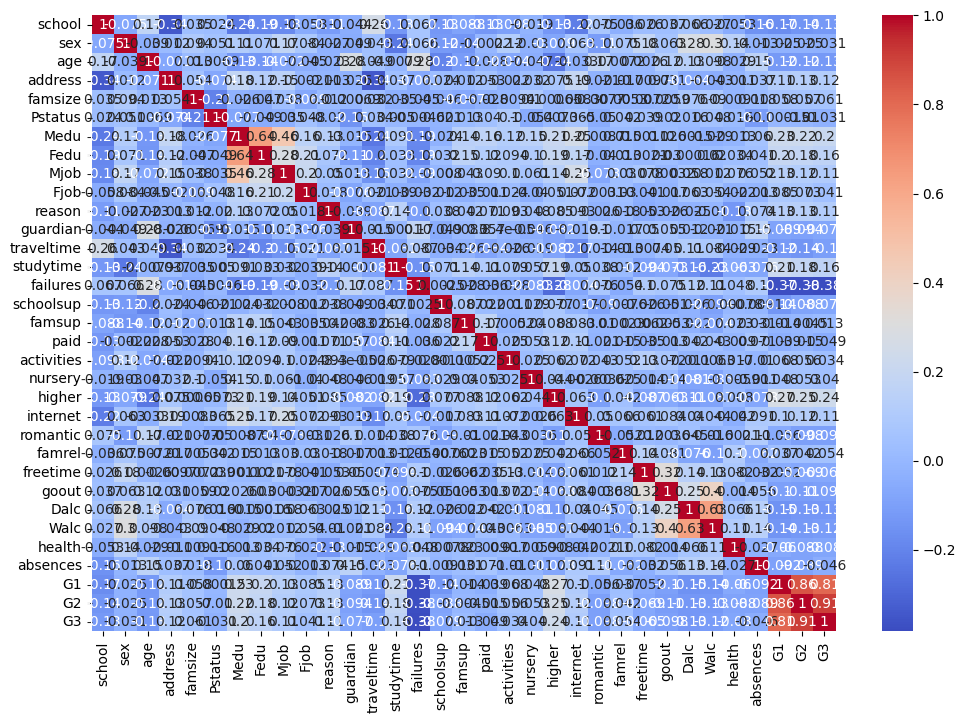

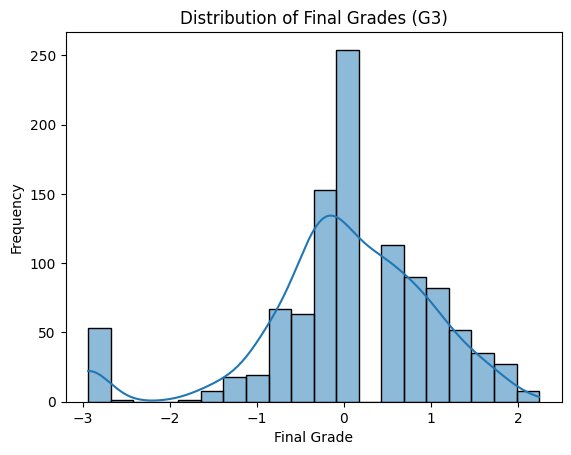

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of final grades
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Create new features (example: average of grades)
df['average_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X = df.drop(['G3'], axis=1)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

Linear Regression - MAE: 1.5332631496183905e-15, MSE: 3.794543660730959e-30, R2: 1.0
Decision Tree - MAE: 0.06316920803583741, MSE: 0.020200278057401256, R2: 0.9805032694449051
Random Forest - MAE: 0.08861029691929037, MSE: 0.02270011056290485, R2: 0.9780905026179251
Gradient Boosting - MAE: 0.10382348664477123, MSE: 0.021021654622015145, R2: 0.9797105002800925


In [7]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Gradient Boosting
gb_model = GradientBoostingRegressor()
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print("Gradient Boosting Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

# Cross-validation for Random Forest
rf_model = RandomForestRegressor()
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Random Forest Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

Gradient Boosting Cross-Validation R² Scores: [0.97820604 0.96634757 0.94714724 0.93894318 0.98380453]
Mean R²: 0.9628897146140021
Random Forest Cross-Validation R² Scores: [0.98063481 0.95890367 0.94890539 0.94509225 0.9788343 ]
Mean R²: 0.9624740827985117


In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_gb_model = grid_search.best_estimator_
print("Best Gradient Boosting Parameters:", grid_search.best_params_)

# Evaluate best model
y_pred = best_gb_model.predict(X_test)
print("Best Gradient Boosting - MAE:", mean_absolute_error(y_test, y_pred))
print("Best Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred))
print("Best Gradient Boosting - R²:", r2_score(y_test, y_pred))

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting - MAE: 0.08810340482883465
Best Gradient Boosting - MSE: 0.015557127510290278
Best Gradient Boosting - R²: 0.9849847055363552


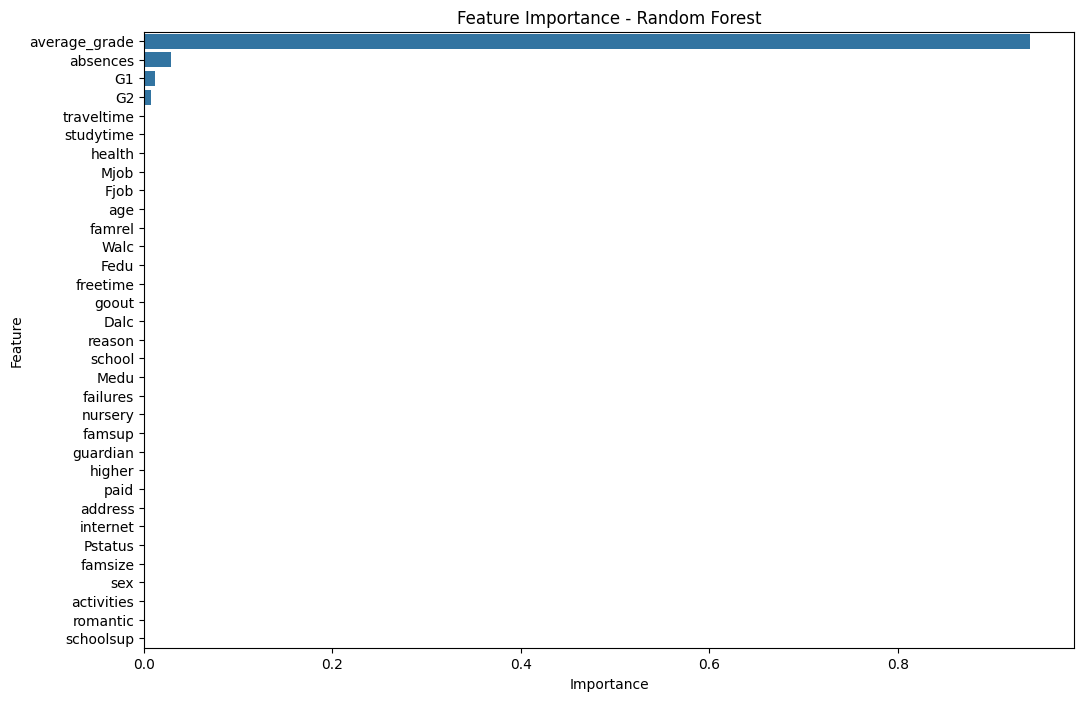

In [9]:
# Feature importance for Random Forest
importances = models['Random Forest'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting - MAE: 0.0877510175891101
Best Gradient Boosting - MSE: 0.015457370672522964
Best Gradient Boosting - R²: 0.9850809879826389
Gradient Boosting Cross-Validation R² Scores: [0.97911034 0.97382678 0.96278408 0.94990238 0.98567197]
Mean R²: 0.9702591095600773


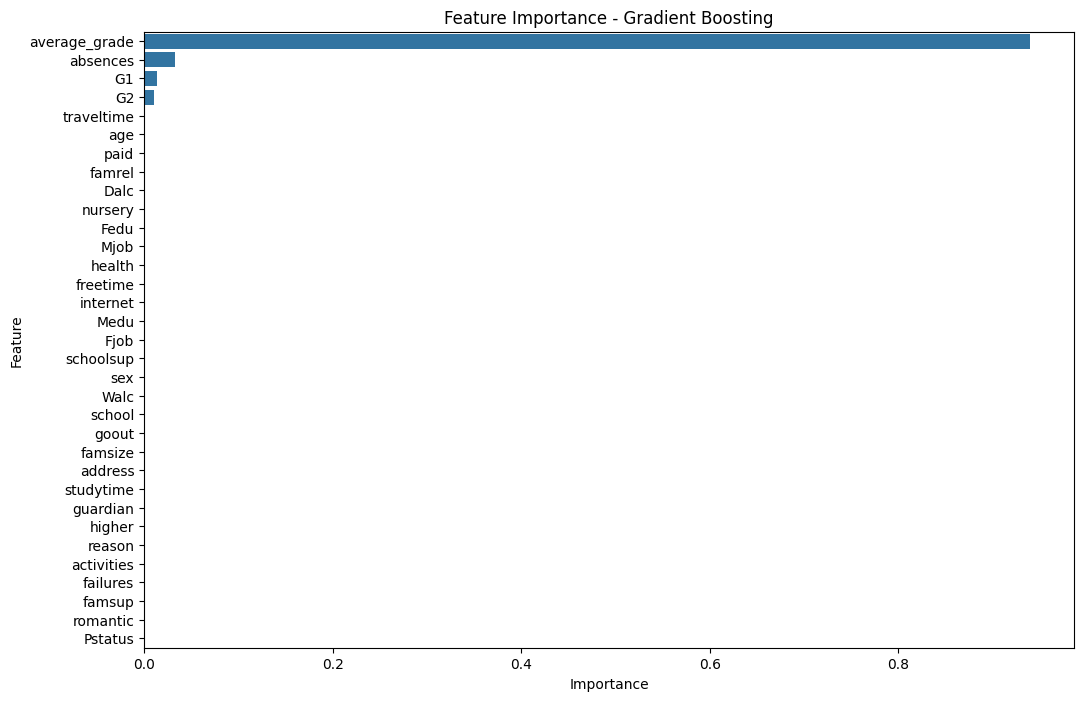

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets from CSV files
math_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=';')

# Combine both datasets
df = pd.concat([math_df, por_df], axis=0).reset_index(drop=True)

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature Scaling
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create new features
df['average_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Split the data into training and testing sets
X = df.drop(['G3'], axis=1)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_gb_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Gradient Boosting Parameters:", grid_search.best_params_)
print("Best Gradient Boosting - MAE:", mae)
print("Best Gradient Boosting - MSE:", mse)
print("Best Gradient Boosting - R²:", r2)

# Cross-validation for Gradient Boosting
cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='r2')
print("Gradient Boosting Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

# Feature importance
importances = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Gradient Boosting')
plt.show()